In [1]:
# Importing dataset from scikit-learn
from sklearn.datasets import load_boston
# Importing pandas for DataFrame
import pandas as pd
# Importing seaborn for visualization
import seaborn as sns
# Importing numpy for some math operations
import numpy as np

# Inline magic to display graphs on Jupyter
%matplotlib inline

In [2]:
# Loading the boston housing dataset
boston_dataset = load_boston()

In [3]:
# Checking out some datasets description
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# Loading the data into a pandas DataFrame object
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Looking at some rows about this dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

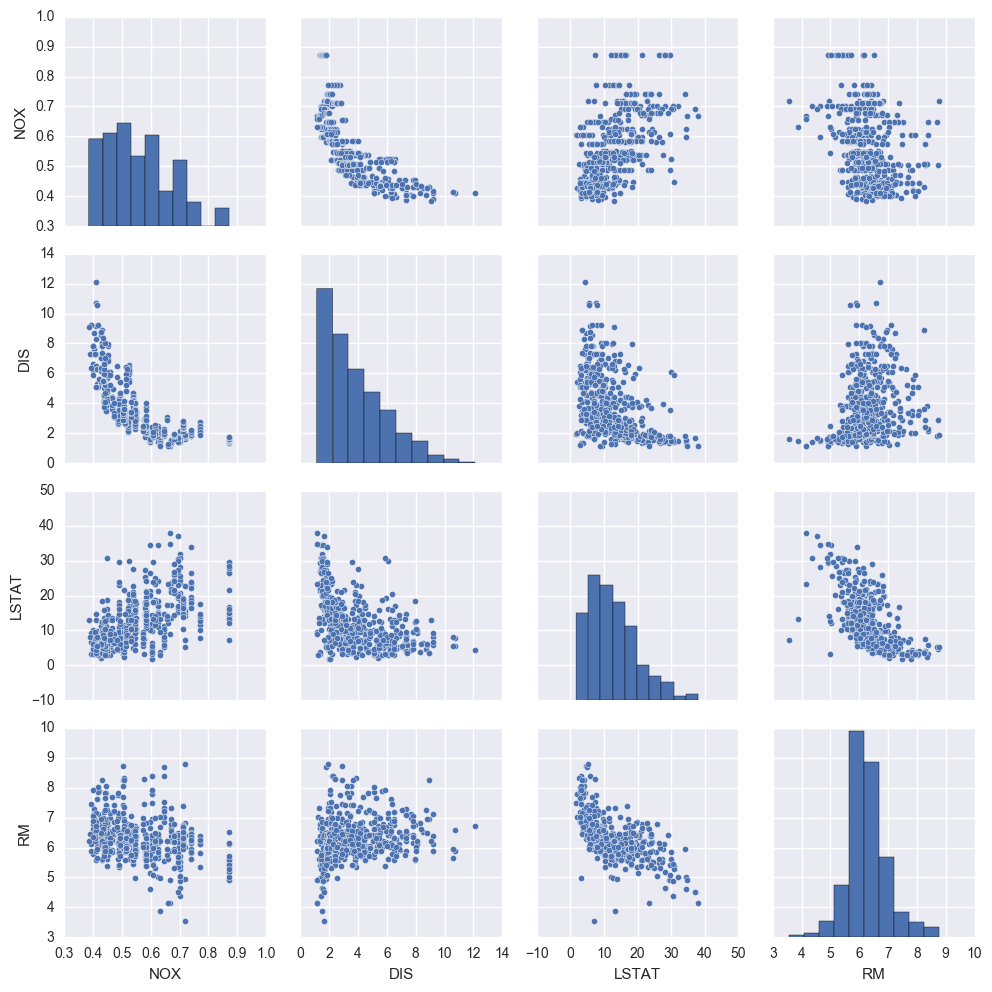

In [5]:
# Doing some pairplot to explore some features like NOX, DIS, LSTAT, and RM

sns.pairplot(df[['NOX', 'DIS', 'LSTAT', 'RM']])

In [6]:
# Adding a column to the DataFrame to display the house prices vs other features
combined_df = df.copy(deep=True)
combined_df['PRICE'] = boston_dataset.target

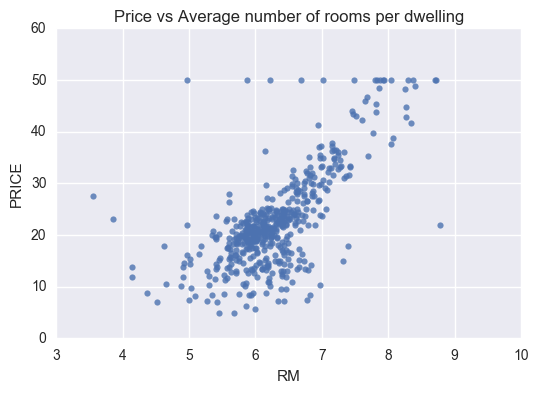

In [7]:
ax = sns.regplot(x="RM", y="PRICE", data=combined_df, fit_reg=False)
ax.set_title('Price vs Average number of rooms per dwelling')

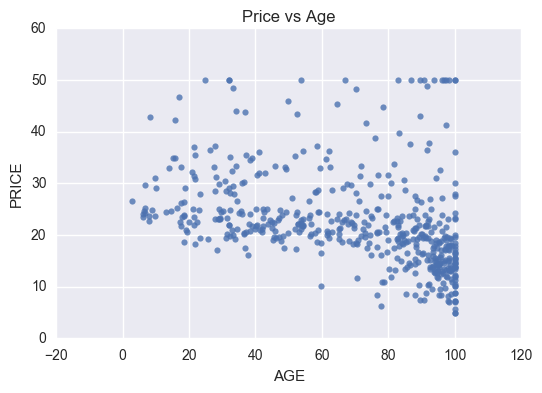

In [8]:
ax = sns.regplot(x="AGE", y="PRICE", data=combined_df, fit_reg=False)
ax.set_title('Price vs Age')

In [9]:
# Importing utility function to split up the dataset
from sklearn.model_selection import train_test_split

In [10]:
# Importing LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

score_array = []

for _ in range(10):
    train_X, test_X, train_Y, test_Y = train_test_split(df, boston_dataset.target)
    ols_clf = LinearRegression()
    ols_clf.fit(train_X, train_Y)
    score_array.append(ols_clf.score(test_X, test_Y))
    
score_average = np.array(score_array).mean()
print('LinearRegression Average Score: {}'.format(score_average))

LinearRegression Average Score: 0.692158407086


In [11]:
# Importing RidgeRegression model from scikit-learn
from sklearn.linear_model import Ridge

score_array = []

for _ in range(10):
    train_X, test_X, train_Y, test_Y = train_test_split(df, boston_dataset.target)
    ridge_clf = Ridge()
    ridge_clf.fit(train_X, train_Y)
    score_array.append(ols_clf.score(test_X, test_Y))

score_average = np.array(score_array).mean()
print('RidgeRegression Average Score: {}'.format(score_average))

RidgeRegression Average Score: 0.762932071998


In [12]:
# Importing LassoRegression model from scikit-learn
from sklearn.linear_model import Lasso

score_array = []

for _ in range(10):
    train_X, test_X, train_Y, test_Y = train_test_split(df, boston_dataset.target)
    lasso_clf = Lasso()
    lasso_clf.fit(train_X, train_Y)
    score_array.append(ols_clf.score(test_X, test_Y))

score_average = np.array(score_array).mean()
print('LassoRegression Average Score: {}'.format(score_average))

LassoRegression Average Score: 0.7263855755
